In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Boston.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
cols = ['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']
for i in cols:
    df[i] = df[i].fillna(df[i].mean())

In [7]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [8]:
# X = X.apply(pd.to_numeric, errors='coerce')
# y = pd.to_numeric(y, errors='coerce')

In [24]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)
acc = model.score(X_test,y_test)
acc

0.7622378773793823

In [28]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 17.4359959439985
R²: 0.7622378773793823


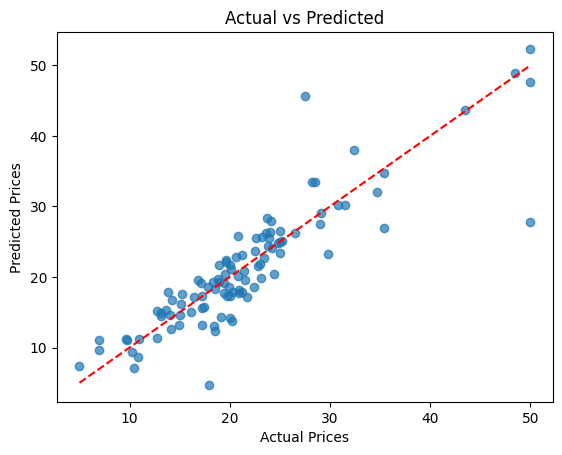

In [29]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [30]:
| **Column** | **Description**                                                                                                   |
| ---------- | ----------------------------------------------------------------------------------------------------------------- |
| `CRIM`     | **Per capita crime rate** by town. High values may indicate a less desirable area.                                |
| `ZN`       | **Proportion of residential land** zoned for large lots (over 25,000 sq.ft.). High values suggest suburban areas. |
| `INDUS`    | **Proportion of non-retail business acres** per town. Higher values may suggest more industry.                    |
| `CHAS`     | **Charles River dummy variable** (1 if tract bounds river; 0 otherwise).                                          |
| `NOX`      | **Nitric oxide concentration** (in parts per 10 million). Indicator of air pollution.                             |
| `RM`       | **Average number of rooms per dwelling**. More rooms usually mean higher house value.                             |
| `AGE`      | **Proportion of owner-occupied units built before 1940**. High values indicate older buildings.                   |
| `DIS`      | **Weighted distances to five Boston employment centers**. Lower values mean closer to jobs.                       |
| `RAD`      | **Index of accessibility to radial highways**. Higher values = better highway access.                             |
| `TAX`      | **Property tax rate** per \$10,000.                                                                               |
| `PTRATIO`  | **Pupil-teacher ratio** by town. Lower is generally better for education.                                         |
| `B`        | **1000(Bk - 0.63)²**, where Bk is the proportion of Black residents. A demographic-related variable.              |
| `LSTAT`    | **% of lower status population**. Higher values = more poverty.                                                   |
| `MEDV`     | **Median value of owner-occupied homes** in \$1000s (Target variable).                                            |


SyntaxError: invalid syntax (47181290.py, line 1)